In [26]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Load the training data**

In [27]:
import datetime
from implementations import *

data, pred, ids = load_data("train.csv")
for i in range(data.shape[1]):
    data[:][i] = standardize(data[:][i])[0]
y, tx = build_model_data(data, pred)

## Linear regression using gradient descent

Here we train our model using GD with MSE

In [61]:
initial_w = np.zeros(tx.shape[1])
max_iters = 1000
gamma = 3.33e-7

start_time = datetime.datetime.now()
w, loss = mean_squared_error_gd(y, tx, initial_w, max_iters, gamma)
end_time = datetime.datetime.now()
print(f"Execution time {(end_time - start_time).total_seconds()} seconds")

Execution time 8.531611 seconds


### Compute the accuracy

In [62]:
actual_pred = np.dot(tx, w)
actual_pred = (actual_pred > 0.5).astype(float)
correctly_classified = np.sum(actual_pred == pred)
accuracy = correctly_classified / len(pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 66.2932%


### Feature analysis

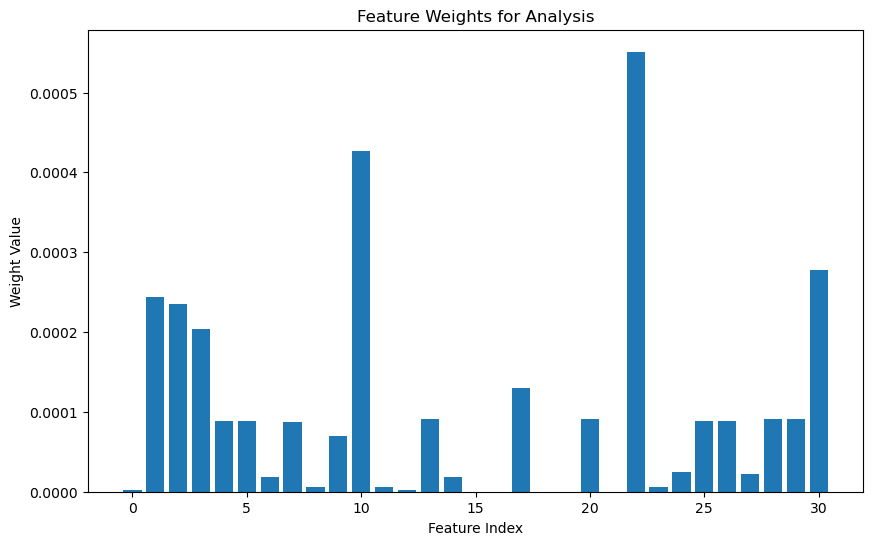

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(w)), np.abs(w))
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.title('Feature Weights for Analysis')
plt.show()

**We select only the most influent features and train back our parameters to see if we get better accuracy**

In [63]:
filter_data = tx[:, w > 0.0000005]
y, tx_filtered = build_model_data(filter_data, pred)
print(tx_filtered.shape)

(250000, 19)


In [64]:
initial_w = np.zeros(tx_filtered.shape[1])
max_iters = 1000
gamma = 3.33e-7

start_time = datetime.datetime.now()
w_filtered, loss_filtered = mean_squared_error_gd(y, tx_filtered, initial_w, max_iters, gamma)
end_time = datetime.datetime.now()
print(f"Execution time {(end_time - start_time).total_seconds()} seconds with loss = {loss_filtered}")

Execution time 6.700006 seconds with loss = 0.10950342709966822


In [65]:
actual_pred = np.dot(tx_filtered, w_filtered)
actual_pred = (actual_pred > 0.5).astype(float)
correctly_classified = np.sum(actual_pred == pred)
accuracy = correctly_classified / len(pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 64.83919999999999%


# **Load the testing data**

In [110]:
test_data, test_pred, test_ids = load_data("test.csv")
for i in range(test_data.shape[1]):
    test_data[:][i] = standardize(test_data[:][i])[0]
test_y, test_tx = build_model_data(test_data, test_pred)

### Predict the label with our trained model

In [112]:
test_y = np.dot(test_tx, w)
test_y = (test_y > 0.5).astype(float)